# Title : Heart Disease
**Authar** : Hamza Hayat\
**date**    : **10/4/2025**\
**Dataset Source** : [Dataset link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
## About Dataset
### Context
Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
### Content
Attribute Information:
- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute


### Aims and Objective
we will fill after doing some exploratory data analysis(EDA)

### Importing Libraries
lets start the project by importing all the libraries we need in this project

In [98]:
# importing the necessary libraries
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# to preprocess the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for ML models
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
# ML models for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# importing column transformer
from sklearn.compose import ColumnTransformer
# classification metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# import warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [99]:
from google.colab import drive

# 🔗 Google Drive ko Colab se connect karo
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
file_path = '/content/drive/MyDrive/heart_disease_uci.csv'
df = pd.read_csv(file_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Exploratry Data Analysis (EDA)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [102]:
# age column
df['age'].min(),df['age'].max()

(28, 77)

Text(0.5, 1.0, 'Distribution OF AGE COLUMN')

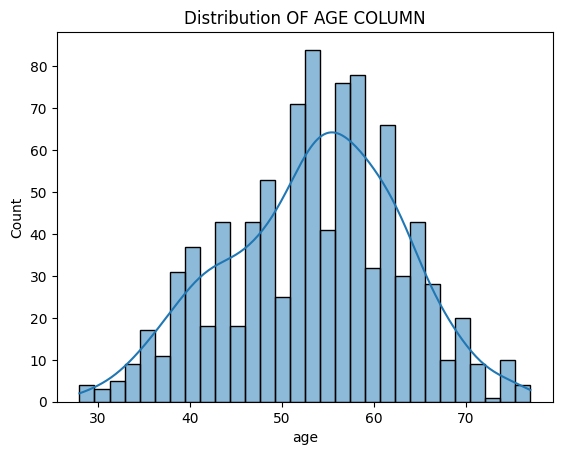

In [103]:
# draw a histplot to see the distribution of age column
sns.histplot(data=df,x='age',bins=30,kde=True)
plt.title('Distribution OF AGE COLUMN')

In [104]:
# printing the mean and median of age column
print(f"THE MEAN OF AGE COLUMN IS : {df['age'].mean()}")
print(f"THE MEDIAN OF AGE COLUMN IS : {df['age'].median()}")
print(f"MODE OF THE AGE COLUMN IS :",df['age'].mode()[0])

THE MEAN OF AGE COLUMN IS : 53.51086956521739
THE MEDIAN OF AGE COLUMN IS : 54.0
MODE OF THE AGE COLUMN IS : 54


In [105]:
# plotting the histogram for age column with the base of sex column using plotly
fig = px.histogram(df, x='age', color='sex', nbins=30, barmode='stack', width=700, height=500)
fig.show()


In [106]:
# checking the value count of sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [107]:
# calculating the percentage of each sex in the data set
female_count = 194
male_count = 726
total_count = female_count + male_count
female_percentage = (female_count / total_count) * 100
male_percentage = (male_count / total_count) * 100
# printing the percentage
print(f" Female Percentage in data: {female_percentage:.2f}%")
print(f" Male Percentage in data: {male_percentage:.2f}%")

 Female Percentage in data: 21.09%
 Male Percentage in data: 78.91%


In [108]:
# find the value count of age column grouped by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [109]:
# lets deal with dataset coulumn
# find the unique values in the data set column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [110]:
# checking for values count in the dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [111]:
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

In [112]:
# plot the countplot for datasetv column using plotly
fig = px.histogram(df, x='dataset', color='sex', barmode='group', width=700, height=500)
fig.show()

In [113]:

# printing the mean .mode and median of age column by grouped by dataset column
print(f"the mean age by dataset is : {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------------------------")
print(f"the median age by dataset is : {df.groupby('dataset')['age'].median()}")
print("-------------------------------------------------------")
print(f"the mode age by dataset is : {df.groupby('dataset')['age'].agg(lambda x: x.mode().iloc[0])}")


the mean age by dataset is : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------------------------
the median age by dataset is : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------------------------
the mode age by dataset is : dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


### Lets Explore cp(Chest Pain) columns

In [114]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [115]:
df.groupby('cp')['dataset'].value_counts()

cp               dataset      
asymptomatic     Cleveland        144
                 VA Long Beach    131
                 Hungary          123
                 Switzerland       98
atypical angina  Hungary          105
                 Cleveland         51
                 VA Long Beach     14
                 Switzerland        4
non-anginal      Cleveland         86
                 Hungary           54
                 VA Long Beach     47
                 Switzerland       17
typical angina   Cleveland         23
                 Hungary           11
                 VA Long Beach      8
                 Switzerland        4
Name: count, dtype: int64

In [116]:
# creating a histplot for cp column and grouped by age column using plotly
fig=px.histogram(df,x='age',color='cp',width=700,height=500)
fig.show()


<Axes: xlabel='cp', ylabel='count'>

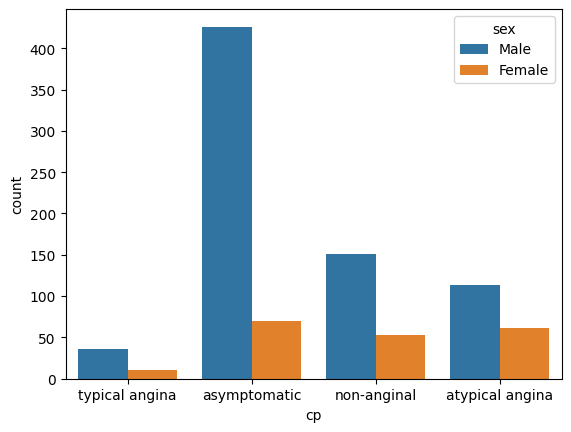

In [117]:
sns.countplot(data=df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='Count'>

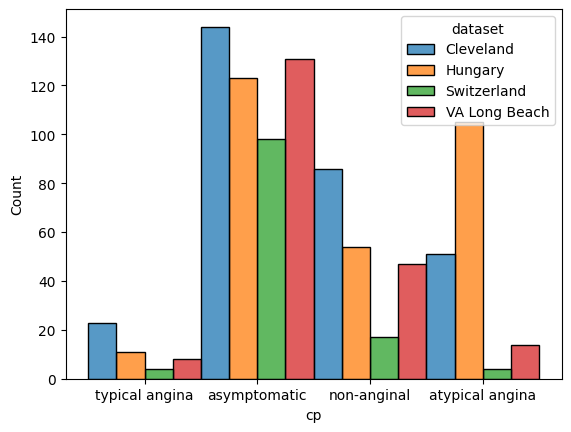

In [118]:
# count plot of cp column by dataset column
sns.histplot(data=df,x='cp',hue='dataset',multiple='dodge')

### Lets explore the trestbs (resting blood pressure) column
the normal resting blood pressure is 120/80mm Hg

In [119]:
df['trestbps'].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


<Axes: xlabel='trestbps', ylabel='Count'>

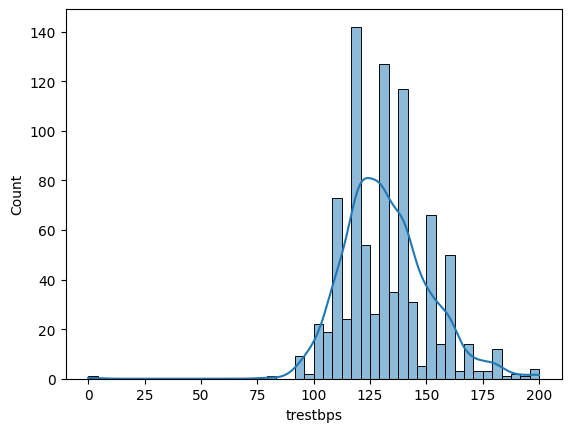

In [120]:
# creat a histplot for trestbps column
sns.histplot(data=df,x='trestbps',kde=True)

In [121]:
# dealing missing values in the trestbps column
print(f"percentage of missing value in trestbps column: {df['trestbps'].isnull().mean() * 100:.2f}%")

percentage of missing value in trestbps column: 6.41%


In [122]:
# imputing the missing values in the trestbps column using iterative imputer
# creat an object of iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)
# fiting and tranforming the trestbps column
df['trestbps']= imputer_1.fit_transform(df[['trestbps']])
# checking for null values in this column
print(f"precentage of missing value in trestbps column after imputation: {df['trestbps'].isnull().mean()*100:.2f}%")

precentage of missing value in trestbps column after imputation: 0.00%


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [124]:
# imputing missing values using iterative imputer for ca,oldpeak,thalch,chol column
# crating an object of iterative imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# fitting and transforming the specified columns
df['ca']= imputer_2.fit_transform(df[['ca']])
df['oldpeak']= imputer_2.fit_transform(df[['oldpeak']])
df['thalch']= imputer_2.fit_transform(df[['thalch']])
df['chol']= imputer_2.fit_transform(df[['chol']])


<span style="
  font-family: Georgia, 'Times New Roman', serif;
  font-weight:700;
  font-size:36px;
  line-height:1;
  display:inline-block;
  background:linear-gradient(90deg,#FFD95A 0%,#FFB84D 40%,#E6A800 70%,#FBE7A6 100%);
  -webkit-background-clip:text;
  background-clip:text;
  -webkit-text-fill-color:transparent;
  text-shadow: 0 1px 0 rgba(255,255,255,0.35), 0 6px 18px rgba(230,170,0,0.12);
">
  Dealing With Missing Values
</span>


In [125]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [126]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [128]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [129]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [130]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2


In [131]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 75.86 accuracy



In [132]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0


<span style="
  font-family: Georgia, 'Times New Roman', serif;
  font-weight:700;
  font-size:36px;
  display:inline-block;
  background:linear-gradient(90deg,#FFD95A 0%,#FFB84D 40%,#E6A800 70%,#FBE7A6 100%);
  -webkit-background-clip:text;
  background-clip:text;
  -webkit-text-fill-color:transparent;
  text-shadow:0 1px 0 rgba(255,255,255,0.35),0 6px 18px rgba(230,170,0,0.12);
">
  Dealing With Outliers
</span>


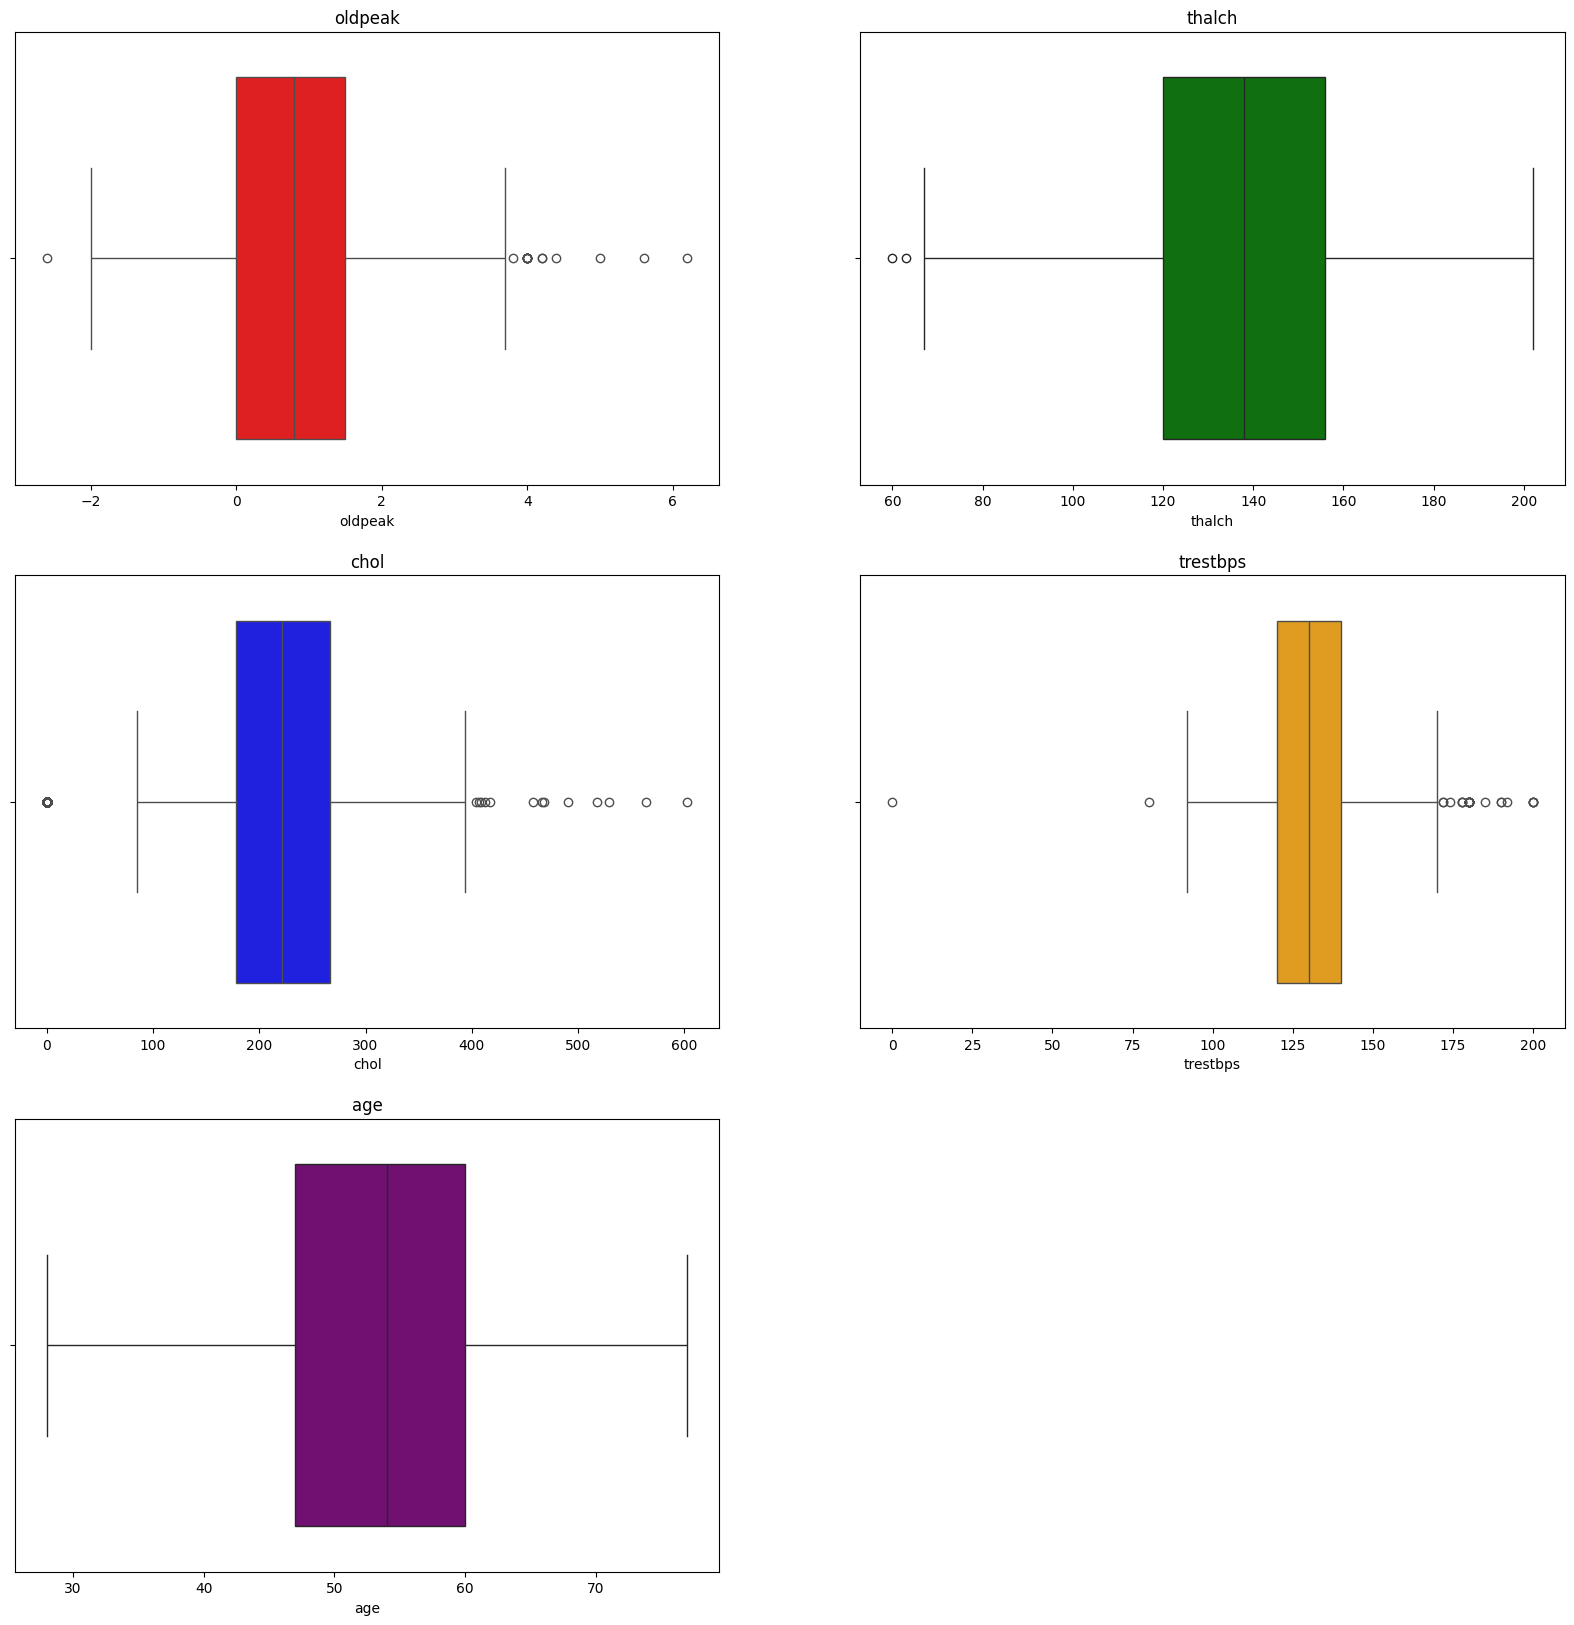

In [133]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [134]:
numeric_cols

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [135]:
# creating a box plot by using plotly
fig1 = px.box(df,y='oldpeak')
fig1.show()
# for thalch column
fig2=px.box(df,y='thalch')
fig2.show()
# for chol column
fig3 = px.box(df,y='chol')
fig3.show()
# for trestbps column
fig4 = px.box(df,y='trestbps')
fig4.show()
#for age column
fig5 = px.box(df,y='age')
fig5.show()

In [136]:
# print the rows where chol is 0
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.000000,False,0.700000,upsloping,0.676375,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.000000,False,0.200000,upsloping,0.676375,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.000000,True,0.878788,flat,0.676375,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.000000,True,1.000000,flat,0.676375,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.000000,False,2.800000,upsloping,0.676375,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.000000,False,0.500000,upsloping,0.676375,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.000000,False,3.000000,flat,0.676375,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.000000,True,1.000000,downsloping,0.676375,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,137.545665,True,0.878788,flat,0.676375,reversable defect,1


In [137]:
# print those row where trestpbs is 0
df[df['trestbps']==0]
# dropin this where trspbps is 0
df = df[df['trestbps'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


<span style="
  font-family: Georgia, 'Times New Roman', serif;
  font-weight:700;
  font-size:36px;
  display:inline-block;
  background:linear-gradient(90deg,#FFD95A 0%,#FFB84D 40%,#E6A800 70%,#FBE7A6 100%);
  -webkit-background-clip:text;
  background-clip:text;
  -webkit-text-fill-color:transparent;
  text-shadow:0 1px 0 rgba(255,255,255,0.35),0 6px 18px rgba(230,170,0,0.12);
">
  Lets Explore Others Columns
</span>


In [138]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [139]:
# exploring the chol column usiing plotly
fig = px.histogram(df, x='chol', nbins=30, width=700, height=500)
fig.show()


In [140]:
#  exploring the fbs column
fig = px.histogram(df, x='fbs', nbins=30, width=700, height=500)
fig.show()


In [141]:
# checking for unique values in fbs column
df['fbs'].unique()

array([True, False], dtype=object)

In [142]:
# converting it into integer for better understanding
df['fbs']=df['fbs'].astype(int)
df['fbs'].unique()

array([1, 0])

In [143]:
df['fbs'].value_counts()

,count
fbs,
0,781
1,138


In [144]:
 #Now we will create a bar plot of the **fbs** column grouped by **sex**,
 #and we will check whether **males** or **females** have higher **chol** values in this dataset.

# 1) simple grouped bar of fbs by sex
fig = px.histogram(df, x='fbs', color='sex', barmode='group', width=700, height=450,
             labels={'fbs':'Fasting blood sugar (>120 mg/dl)', 'sex':'Sex'} )
fig.update_layout(title='Count of fbs by sex')
fig.show()



In [145]:
# lets jump into the restecg column and explore it , and i think this column is very important for our analysis
# checking for unique values in fbs column
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [146]:
# checking for values cunts
df['restecg'].value_counts()

,count
restecg,
normal,552
lv hypertrophy,188
st-t abnormality,179


In [147]:
fig = px.histogram(df,x='restecg',width=700,height=500)
fig.show()

In [148]:
# grouped by sex base
fig = px.histogram(df, x='restecg', color='sex', barmode='group', width=700, height=500)
fig.show()

In [149]:
# lets dive into thalach column
fig = px.histogram(df, x='thalch',width=700, height=500)
fig.show()

In [150]:
df['thalch'].describe()

,thalch
count,919.000000
mean,137.526672
std,25.145577
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [151]:
# droping these columns bcs we dont need it
df.drop(['id','dataset','sex'], axis=1, inplace=True)


<span style="
  font-family: Georgia, 'Times New Roman', serif;
  font-weight:700;
  font-size:36px;
  display:inline-block;
  background:linear-gradient(90deg,#FFD95A 0%,#FFB84D 40%,#E6A800 70%,#FBE7A6 100%);
  -webkit-background-clip:text;
  background-clip:text;
  -webkit-text-fill-color:transparent;
  text-shadow:0 1px 0 rgba(255,255,255,0.35),0 6px 18px rgba(230,170,0,0.12);
">
  Machine Learning
</span>


In [152]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,typical angina,145.0,233.0,1,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,non-anginal,130.0,250.0,0,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [153]:
# exploring the num column which is last column
# checking for unique values in num column
df['num'].unique()

array([0, 2, 1, 3, 4])

In [154]:
# value counts
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,106
4,28


the target column is `num` which is the predicted attribute , we will use this column to predict the heart disease.
the unique values in  this column are : [0,1,2,3,4] , whuch states that there are 5 types of heart disease.
- `0 = no heart disease`
- `1 = mild heart disease`
- `2 = moderate heart disease`
- `3 = severe heart disease type 3`
- `4 = critical heart disease`

In [155]:
categorical_cols

['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']

Enlist all the models that you will use to predict heart disease these models should be classifier for multi_class classification
1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [156]:
# importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# importing navie bayes model
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
# importing matrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# import warnings
import warnings
warnings.filterwarnings('ignore')


In [157]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,typical angina,145.0,233.0,1,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,non-anginal,130.0,250.0,0,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [158]:
X = df.drop('num',axis=True)
# y = df['num']
# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit and transform numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Save scaled data to a new DataFrame (optional)
scaled_df = df.copy()
# X and y
X = df.drop('num',axis=True)
y = df['num']


In [159]:


df.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,0.520597,0.435635,0.330592,0.150163,0.545962,0.395240,0.225458,0.248368
std,0.192443,0.149422,0.180462,0.357426,0.177082,0.119790,0.180654,0.285350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.296020,0.000000,0.422535,0.295455,0.225458,0.000000
50%,0.530612,0.416667,0.366501,0.000000,0.549296,0.386364,0.225458,0.250000
75%,0.653061,0.500000,0.442786,0.000000,0.676056,0.465909,0.225458,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:

model= {

    # 1️⃣ Logistic Regression
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['liblinear', 'lbfgs'],
            'C': [0.1, 1.0, 10]
        }
    },

    # 2️⃣ Decision Tree Classifier
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10, None]
        }
    },

    # 3️⃣ Support Vector Classifier (SVM)
    'SVC': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1, 10, 100]
        }
    },

    # 4️⃣ K-Nearest Neighbors
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },

    # 5️⃣ Random Forest Classifier
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20]
        }
    },

    # 6️⃣ XGBoost Classifier
    'XGBClassifier': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },

    # 7️⃣ Gradient Boosting Classifier
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },

    # 8️⃣ AdaBoost Classifier
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },

    # 9️⃣ Naive Bayes
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}   # No major hyperparameters
    }
}


In [161]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.714286,typical angina,0.541667,0.386401,1.0,lv hypertrophy,0.633803,False,0.556818,downsloping,0.000000,fixed defect,0.00
1,0.795918,asymptomatic,0.666667,0.474295,0.0,lv hypertrophy,0.338028,True,0.465909,flat,1.000000,normal,0.50
2,0.795918,asymptomatic,0.333333,0.379768,0.0,lv hypertrophy,0.485915,True,0.590909,flat,0.666667,reversable defect,0.25
3,0.183673,non-anginal,0.416667,0.414594,0.0,normal,0.894366,False,0.693182,downsloping,0.000000,normal,0.00
4,0.265306,atypical angina,0.416667,0.338308,0.0,lv hypertrophy,0.788732,False,0.454545,upsloping,0.000000,normal,0.00


In [162]:
model_results = []
best_model = None
best_model_name = None
best_accuracy = 0.0
best_params = None
best_base_model = None

# Encode features
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object' or str(X_encoded[col].dtype) == 'category':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

# Encode target
y = df['num'].round().astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Loop through models
for name, classifier in model.items():
    print(f"🔍 Training {name}...")

    grid = GridSearchCV(
        estimator=classifier['model'],
        param_grid=classifier['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        return_train_score=False,

    )

    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    model_results.append({
        'model_name': name,
        'accuracy_score': acc,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'best_params': grid.best_params_
    })

    # Check if this is the best model so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_params = grid.best_params_
        best_base_model = classifier['model']

# Sort & display results
sorted_models = pd.DataFrame(model_results)
sorted_models = sorted_models.sort_values(by='accuracy_score', ascending=False)

display(sorted_models[['model_name', 'accuracy_score', 'confusion_matrix', 'best_params']].round(3))

print("\n🏆 Best Model:", best_model_name)
print("✅ Accuracy:", round(best_accuracy, 3))
print("🧠 Best Params:", best_params)

# 🧠 Final train best model with best params
best_model = best_base_model.set_params(**best_params)
best_model.fit(X_train, y_train)

print(f"🚀 Final Best Model '{best_model_name}' is trained with best params and ready to save.")

🔍 Training LogisticRegression...
🔍 Training DecisionTreeClassifier...
🔍 Training SVC...
🔍 Training KNeighborsClassifier...
🔍 Training RandomForestClassifier...
🔍 Training XGBClassifier...
🔍 Training GradientBoostingClassifier...
🔍 Training AdaBoostClassifier...
🔍 Training NaiveBayes...


,model_name,accuracy_score,confusion_matrix,best_params
4,RandomForestClassifier,0.880,"[[155, 2], [20, 7]]","{'max_depth': 20, 'n_estimators': 200}"
6,GradientBoostingClassifier,0.875,"[[152, 5], [18, 9]]","{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
0,LogisticRegression,0.859,"[[153, 4], [22, 5]]","{'C': 10, 'solver': 'liblinear'}"
7,AdaBoostClassifier,0.859,"[[157, 0], [26, 1]]","{'learning_rate': 0.1, 'n_estimators': 200}"
2,SVC,0.853,"[[157, 0], [27, 0]]","{'C': 1, 'kernel': 'linear'}"
5,XGBClassifier,0.853,"[[157, 0], [27, 0]]","{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
1,DecisionTreeClassifier,0.848,"[[152, 5], [23, 4]]","{'criterion': 'gini', 'max_depth': 3}"
3,KNeighborsClassifier,0.821,"[[147, 10], [23, 4]]","{'n_neighbors': 5, 'weights': 'uniform'}"
8,NaiveBayes,0.799,"[[130, 27], [10, 17]]",{}



🏆 Best Model: RandomForestClassifier
✅ Accuracy: 0.88
🧠 Best Params: {'max_depth': 20, 'n_estimators': 200}
🚀 Final Best Model 'RandomForestClassifier' is trained with best params and ready to save.


<span style="
  font-family: Georgia, 'Times New Roman', serif;
  font-weight:700;
  font-size:36px;
  display:inline-block;
  background:linear-gradient(90deg,#FFD95A 0%,#FFB84D 40%,#E6A800 70%,#FBE7A6 100%);
  -webkit-background-clip:text;
  background-clip:text;
  -webkit-text-fill-color:transparent;
  text-shadow:0 1px 0 rgba(255,255,255,0.35),0 6px 18px rgba(230,170,0,0.12);
">
  Best Model Selection
</span>

We trained 10 different machine learning models on our dataset:

1. Logistic Regression

2. K-Nearest Neighbors (KNN)

3. Naive Bayes (NB)

4. Support Vector Machine (SVM)

5. Decision Tree

6. Random Forest

7. XGBoost

8. Gradient Boosting

9. AdaBoost

10. LightGBM

After evaluating their performance, we found that the Random Forest Classifier achieved the highest accuracy. Therefore, it was selected as the best model for predicting our target variable.

In [163]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.714286,typical angina,0.541667,0.386401,1.0,lv hypertrophy,0.633803,False,0.556818,downsloping,0.000000,fixed defect,0.00
1,0.795918,asymptomatic,0.666667,0.474295,0.0,lv hypertrophy,0.338028,True,0.465909,flat,1.000000,normal,0.50
2,0.795918,asymptomatic,0.333333,0.379768,0.0,lv hypertrophy,0.485915,True,0.590909,flat,0.666667,reversable defect,0.25
3,0.183673,non-anginal,0.416667,0.414594,0.0,normal,0.894366,False,0.693182,downsloping,0.000000,normal,0.00
4,0.265306,atypical angina,0.416667,0.338308,0.0,lv hypertrophy,0.788732,False,0.454545,upsloping,0.000000,normal,0.00


In [164]:
# Dictionary to save encoders
encoders = {}

for col in X.columns:
    if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le  # Save the encoder
        print(f"✅ Column '{col}' encoded.")

✅ Column 'cp' encoded.
✅ Column 'restecg' encoded.
✅ Column 'exang' encoded.
✅ Column 'slope' encoded.
✅ Column 'thal' encoded.


In [165]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.714286,typical angina,0.541667,0.386401,1.0,lv hypertrophy,0.633803,False,0.556818,downsloping,0.000000,fixed defect,0.00
1,0.795918,asymptomatic,0.666667,0.474295,0.0,lv hypertrophy,0.338028,True,0.465909,flat,1.000000,normal,0.50
2,0.795918,asymptomatic,0.333333,0.379768,0.0,lv hypertrophy,0.485915,True,0.590909,flat,0.666667,reversable defect,0.25
3,0.183673,non-anginal,0.416667,0.414594,0.0,normal,0.894366,False,0.693182,downsloping,0.000000,normal,0.00
4,0.265306,atypical angina,0.416667,0.338308,0.0,lv hypertrophy,0.788732,False,0.454545,upsloping,0.000000,normal,0.00


In [166]:
# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Inverse transform numeric columns using the fitted scaler
original_values = scaler.inverse_transform(scaled_df[numeric_cols])

# Step 3: Update the main DataFrame (df) with restored values
df[numeric_cols] = original_values

print("✅ df now has numeric columns back to original scale:")
print(df.head())


✅ df now has numeric columns back to original scale:
    age               cp  trestbps   chol  fbs         restecg  thalch  exang  \
0  63.0   typical angina     145.0  233.0  1.0  lv hypertrophy   150.0  False   
1  67.0     asymptomatic     160.0  286.0  0.0  lv hypertrophy   108.0   True   
2  67.0     asymptomatic     120.0  229.0  0.0  lv hypertrophy   129.0   True   
3  37.0      non-anginal     130.0  250.0  0.0          normal   187.0  False   
4  41.0  atypical angina     130.0  204.0  0.0  lv hypertrophy   172.0  False   

   oldpeak        slope   ca               thal  num  
0      2.3  downsloping  0.0       fixed defect  0.0  
1      1.5         flat  3.0             normal  2.0  
2      2.6         flat  2.0  reversable defect  1.0  
3      3.5  downsloping  0.0             normal  0.0  
4      1.4    upsloping  0.0             normal  0.0  


In [167]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0.0
1,67.0,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2.0
2,67.0,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1.0
3,37.0,non-anginal,130.0,250.0,0.0,normal,187.0,False,3.5,downsloping,0.0,normal,0.0
4,41.0,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0.0


### 2. Output
 1. The youngest age at which a heart attack occurred is 28,\
 2. and the ages 54 and 53 are the ones where the highest number of heart attacks occurred.\
 3. Female Percentage in data: 21.09%
 4. Male Percentage in data: 78.91%
 5. we have the highest number of people from cleveland(304) and lowest from Switzerland(123)
    1. the highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
    2. the highest number of Males in  this dataset from Hungary (212) and lowest from Switzerland (112)
6.  `write down the observation here about mean , median and mode of age column  grouped by dataset column`
    1. the mean age is , Ceveland (54),Hungary is (47),Switzerland (55),VA LONG BEACH(59)
    2. mode of age column grouped by dataset column , Ceveland (58),Hungary(54),Switzerland(61),VA LONG BEACH(62)
7. `THE OBSERVATION  of cap column is`
    1. The highest number of asymptomatic cases were found in Cleveland, and the lowest in Switzerland.
    2. The highest number of atypical angina cases were found in Hungary, and the lowest in Switzerland.
    3. The highest number of non-anginal cases were found in Cleveland, and the lowest in Switzerland.
    4. The highest number of typical angina cases were also found in Cleveland, and the lowest in Switzerland
8.  `The Observation why we used this function`
    1. First, we checked for missing values in the object (categorical) columns. Then, we noticed that some of those columns had a large number of missing values, so we couldn’t replace them using the mode.

    2. After that, we created a function to handle these missing values, in which we used the RandomForestRegressor to predict and fill the missing values.

    3. Now, our dataset has no null values left.
9.  `Observation of chol column`
    1. According to our data, we created a **box plot** of the **chol** column using **Plotly**. In that plot, it showed that **172 data points** have a **chol value of 0**, which appeared as **outliers**.

    2.  However, before handling the missing values, we had **30 missing values** in this column. This means that these **172 values of 0 were not missing values**.

    3. Therefore, it is **possible that these 172 data points with a chol value of 0 are real values**, and that’s why we will **not remove them as outliers**.
10. `Observation of fbs column`
    1. According to our data, there are **138 patients** whose **fbs** is **greater than 120**, meaning their fasting blood sugar level is **not normal**.
    2. Among them, **119 are males** and **19 are females** whose **fbs** is not normal.
11. `Observation of restecg column`
    1. Our **restecg** column contains **three distinct values**.


    2. **normal** → The heart’s electrical activity is normal; no sign of problems.
    3. **stt abnormality** → The ECG shows ST-T wave changes, which may mean reduced blood flow or stress on the heart.
    4. **lv hypertrophy** → The left side of the heart (left ventricle) is thickened, usually due to high blood pressure or long-term heart strain.
    5. `value_counts`\
           1. The number of **normal** cases is **552**, including **433 males** and **119 females**.\
           2. The number of **LV hypertrophy** cases is **188**, including **141 males** and **47 females**.\
           3. The number of **ST-T abnormality** cases is **179**, including **151 males** and **28 females**.
12. `Exploring the thalach column`
    1. The **`thalach`** column shows the **maximum heart rate (in beats per minute)** a person reached during exercise — it indicates how well the heart responds to physical activity.
    2. Most patients’ maximum heart rate is around 120–156 bpm.

    3. The average (137 bpm) shows a normal heart response for middle-aged adults.

    4. Very low (60 bpm) or very high (202 bpm) values might belong to special cases — possibly elderly or young/fit individuals







In [168]:
# import pickle

# # ✅ Save your trained model
# pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))